# BAIS:3250 - Data Wrangling
## Descriptive Statistics
___ 
Mike Colber


Libraries used:

- _**pandas**_ for dataframes and data wrangling functions
- _**matplotlib**_ for creating simple plots when performing exploratory data analysis
- _**seaborn**_ is a high-level interface for creating visually appealing and informative statistical graphics
- _**scipy.stats**_ are tools for both basic and advanced statistical operations


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr

### Read data into a pandas DataFrame

In [6]:
# read in pipe delimited file named mortgage.txt
mortgage_df = pd.read_csv("mortgage.txt", encoding="utf-8", sep="|")

display(mortgage_df)

,CreditScore,HomeAge,YearsEmployed,CreditCardDebt,Year,Default
0,752,24,3,8930,2009,1
1,715,9,8,6403,2009,0
2,635,16,5,7561,2008,0
3,744,20,6,8628,2008,1
4,756,26,8,6083,2008,0
...,...,...,...,...,...,...
1290,786,21,3,5544,2007,0
1291,720,20,6,9676,2009,1
1292,676,17,4,8555,2008,1
1293,620,12,5,5370,2007,0


### Statistics for One Continuous Variable

In [8]:
print(mortgage_df["CreditScore"].unique())

[752 715 635 744 756 684 745 654 737 699 711 687 620 761 740 636 710 645
 753 677 666 672 647 698 713 706 784 712 719 703 680 716 646 655 750 694
 644 735 686 702 657 642 762 691 789 689 771 594 729 709 622 643 741 695
 669 726 592 641 722 627 736 652 701 602 724 768 676 832 721 693 708 649
 791 725 678 707 579 786 807 714 662 639 663 661 601 618 671 670 659 720
 728 797 763 679 637 628 754 759 760 632 682 621 758 809 717 665 697 704
 787 764 600 730 567 640 696 685 631 664 738 688 674 690 746 610 673 757
 772 778 614 747 705 668 751 739 591 608 788 808 733 755 648 611 783 590
 794 700 766 734 650 561 793 795 593 658 742 718 613 829 605 616 563 653
 626 801 748 619 660 675 727 814 770 667 617 749 681 790 624 743 683 596
 560 731 723 774 802 773 634 586 603 767 625 777 599 798 732 765 656 615
 623 775 799 803 633 779 638 782 692 612 816 555 785 776 840 781 604 651
 813 629 562 607 589 835 769 630 828 606 818 780 598 821 800 537 824]


In [9]:
mortgage_df.dtypes

CreditScore        int64
HomeAge            int64
YearsEmployed     object
CreditCardDebt    object
Year              object
Default            int64
dtype: object

<font color="darkmagenta">CreditScore is a numeric data type.</font>

<br>

#### .describe() function

The ```.describe()``` function will automatically calculate many statistics for you with a single function.

In [13]:
# use the .describe() function
descriptive_stats = mortgage_df["CreditScore"].describe()

# descriptive statistics
print(descriptive_stats)


count    1295.000000
mean      696.728185
std        49.570289
min       537.000000
25%       661.000000
50%       696.000000
75%       730.000000
max       840.000000
Name: CreditScore, dtype: float64


<br>

#### Manually calculate descriptive statistics

In [16]:
# define the dataframe and column we are studying
column = mortgage_df["CreditScore"]
column_name = "CreditScore"

In [17]:
print(f"Statistics of the {column_name} column")
print("-"*50)

print(f"{column_name} count: {column.count()}") # number of non-null entries
print(f"{column_name} mean: {column.mean()}") # sum of all values / n


# spread describes the extremes and variation 
print(f"{column_name} min: {column.min()}")
print(f"{column_name} 25%: {column.quantile(0.25)}")  # 25th percentile
print(f"{column_name} median (50%): {column.median()}")  # 50th percentile (same as 2nd quartile)
print(f"{column_name} 75%: {column.quantile(0.75)}")  # 75th percentile
print(f"{column_name} max: {column.max()}")
print(f"{column_name} interquartile range (IQR): {column.quantile(0.75) - column.quantile(0.25)}")
print(f"{column_name} range: {column.max() - column.min()}")

# the most frequent value(s) - if multiple modes exist, it returns all of them as a Series
modes = column.mode()
# handle cases where there are multiple modes
if len(modes) > 1:
    print(f"{column_name} modes: {list(modes)}")
else:
    print(f"{column_name} mode:  {modes[0]}")

print("-"*10)

# average of squared difference between each data point and the mean
print(f"{column_name} variance: {column.var()}") 
print(f"{column_name} std_dev: {column.std()}") # square root of variance


print(f"{column_name} skewness: {column.skew()}")


print(f"{column_name} kurtosis: {column.kurt()}")


Statistics of the CreditScore column
--------------------------------------------------
CreditScore count: 1295
CreditScore mean: 696.7281853281853
CreditScore min: 537
CreditScore 25%: 661.0
CreditScore median (50%): 696.0
CreditScore 75%: 730.0
CreditScore max: 840
CreditScore interquartile range (IQR): 69.0
CreditScore range: 303
CreditScore modes: [691, 714]
----------
CreditScore variance: 2457.2135403674815
CreditScore std_dev: 49.570288887270785
CreditScore skewness: 0.007820844984512163
CreditScore kurtosis: -0.21180695291884621


<br>

#### Shape can be confirmed with visualization. Let's use _Seaborn_.

##### Boxplot

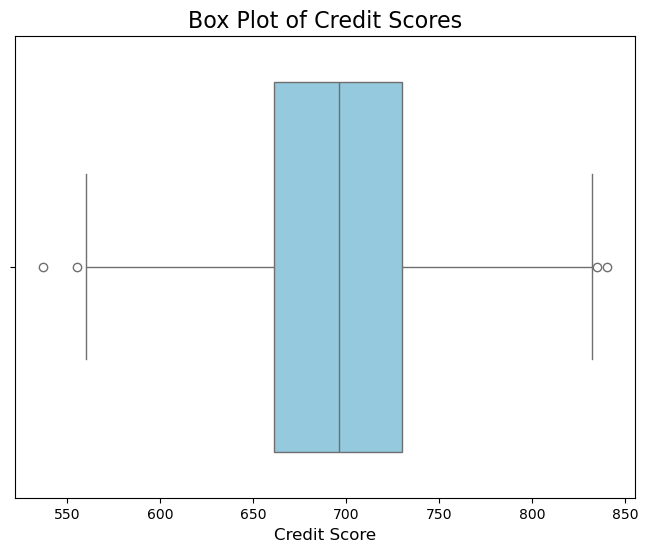

In [20]:
# set plot size
plt.figure(figsize=(8, 6))

# create a box plot for 'CreditScore'
sns.boxplot(x=column, color="skyblue")

# add title and labels
plt.title("Box Plot of Credit Scores", fontsize=16)
plt.xlabel("Credit Score", fontsize=12)

# display the plot
plt.show()

<font color="darkmagenta">Shape is symmetrical (not skewed), with few outliers.</font>

##### Histogram.

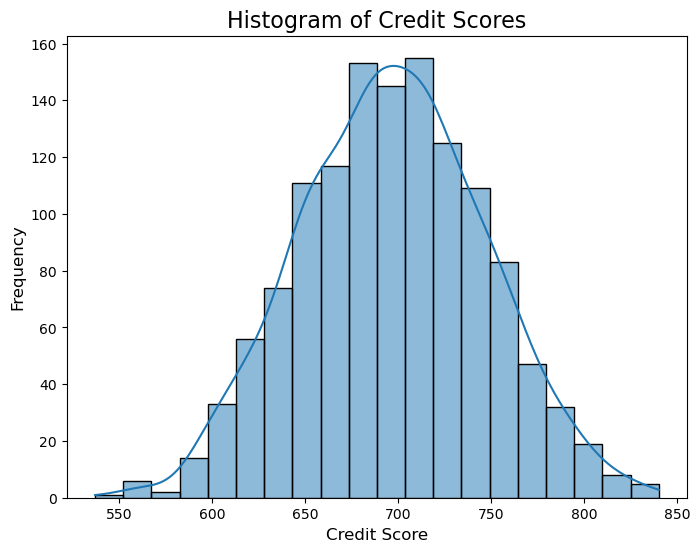

In [23]:
# set plot size
plt.figure(figsize=(8, 6))

# create a histogram for 'CreditScore'
sns.histplot(column, bins=20, kde=True)

# add title and labels
plt.title("Histogram of Credit Scores", fontsize=16)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# display the plot
plt.show()

<font color="darkmagenta">Shape is symmetrical, and unimodal (one peak).  
Somewhat bell-shaped (might be normally distributed).</font>  

##### Check normality with a Q-Q plot.  
A Quantile-Quantile plot compares actual quantiles to expected values under normal distribution 

```scipy.stats.probplot()``` creates the Q-Q plot.  
```dist="norm"``` specifies the theoretical distribution (normal) to compare against.  
```plot=plt``` directs the plot to matplotlib for rendering.

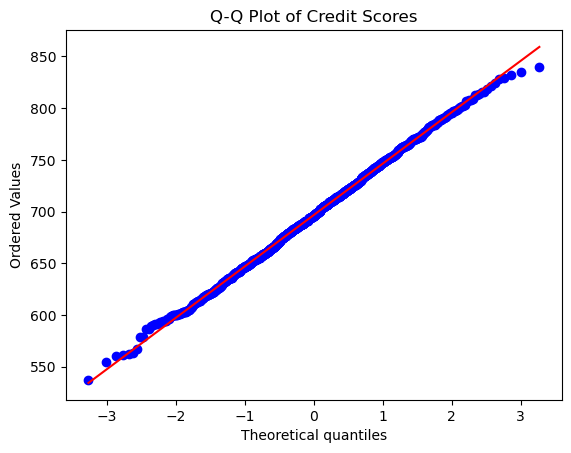

In [27]:
# create a Q-Q plot for 'CreditScore'
stats.probplot(column, dist="norm", plot=plt)

# add title
plt.title("Q-Q Plot of Credit Scores")

# display the plot
plt.show()

<font color="darkmagenta">Marks stay close to the red line, suggesting that credit scores in the data are very close to a normal distribution.</font>

<br>

#### Shapiro-Wilk test
The Shapiro test checks if a dataset follows a normal distribution.  
**Null Hypothesis (H<sub>0</sub>)**: The data is normally distributed.  
**Alternative Hypothesis (H<sub>1</sub>)**: The data is not normally distributed.

In [31]:
# Shapiro-Wilk test for normality
stat, p_value = stats.shapiro(column)

# display the results
print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-Value: {p_value}")

# interpretation
alpha = 0.05  # Significance level
if p_value > alpha:
    print("The data follows a normal distribution (fail to reject H0).")
else:
    print("The data does not follow a normal distribution (reject H0).")

Shapiro-Wilk Test Statistic: 0.9988414129795287
P-Value: 0.577512926271217
The data follows a normal distribution (fail to reject H0).


<font color="darkmagenta">Interpretation:  
If **p-value > 0.05**, the data is normally distributed (fail to reject the null hypothesis H<sub>0</sub>).  
If **p-value ≤ 0.05**, the data is not normally distributed (reject H<sub>0</sub>). </font>  

<br>

### Statistics for One Categorical Variable

#### Make the column a _category_.

In [36]:
print(mortgage_df["Default"].unique())

[1 0]


In [37]:
# change the column to a categorical data type
mortgage_df["Default"] = mortgage_df["Default"].astype("category")


In [38]:
# verify it is a categorical data type
print(mortgage_df["Default"].dtypes)

category


In [39]:
# rename the categorical column values with meaningful labels
mortgage_df["Default"] = mortgage_df["Default"].cat.rename_categories({1: "Defaulted", 0: "Not Defaulted"})

print(mortgage_df.head())


   CreditScore  HomeAge YearsEmployed CreditCardDebt  Year        Default
0          752       24             3           8930  2009      Defaulted
1          715        9             8           6403  2009  Not Defaulted
2          635       16             5           7561  2008  Not Defaulted
3          744       20             6           8628  2008      Defaulted
4          756       26             8           6083  2008  Not Defaulted


#### Frequency counts

In [41]:
# define the dataframe and column we are studying
column = mortgage_df["Default"]
column_name = "Default"

In [42]:
# frequency counts
default_counts = column.value_counts()
print("Frequency Counts:")
print(default_counts)

Frequency Counts:
Default
Not Defaulted    999
Defaulted        296
Name: count, dtype: int64


_Notice this is a Series and the row index are the values (Defaulted / Not Defaulted)._

<br>

Frequency counts sorted in descending order by **level**

In [46]:
# frequency counts sorted in descending order by the value
default_counts = column.value_counts().sort_index(ascending=False)
print("Frequency Counts (Sorted by Value):")
print(default_counts)

Frequency Counts (Sorted by Value):
Default
Defaulted        296
Not Defaulted    999
Name: count, dtype: int64


Frequency counts sorted in descending order by **count value**

In [48]:
# frequency counts sorted in descending order by the count
default_counts_sorted = column.value_counts().sort_values(ascending=False)
print("\nFrequency Counts (Sorted by Frequency):")
print(default_counts_sorted)


Frequency Counts (Sorted by Frequency):
Default
Not Defaulted    999
Defaulted        296
Name: count, dtype: int64


<br>

#### Proportions table

A _proportions table_ is used to express counts as percentages or proportions of the total. It helps to understand the distribution of categorical data.

In [52]:
# frequency counts
default_counts = column.value_counts()

# proportions table based on frequency counts
proportions_table = default_counts / default_counts.sum()

# Display the proportions table
print("Proportions Table:")
print(proportions_table)

Proportions Table:
Default
Not Defaulted    0.771429
Defaulted        0.228571
Name: count, dtype: float64


<br>

#### Visualizations

##### Create a simple bar chart with Seaborn

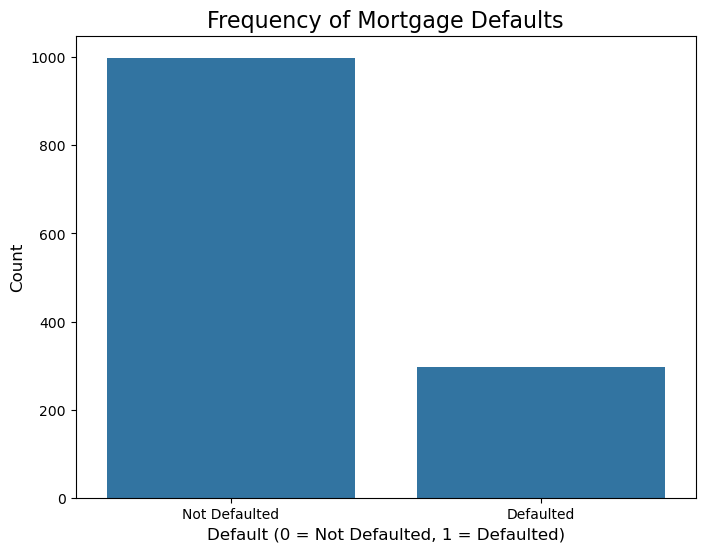

In [56]:
# create a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=default_counts.index, y=default_counts.values)

# add title and labels
plt.title("Frequency of Mortgage Defaults", fontsize=16)
plt.xlabel("Default (0 = Not Defaulted, 1 = Defaulted)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# display the plot
plt.show()

<br>

##### Create a _fancier_ bar chart with Seaborn

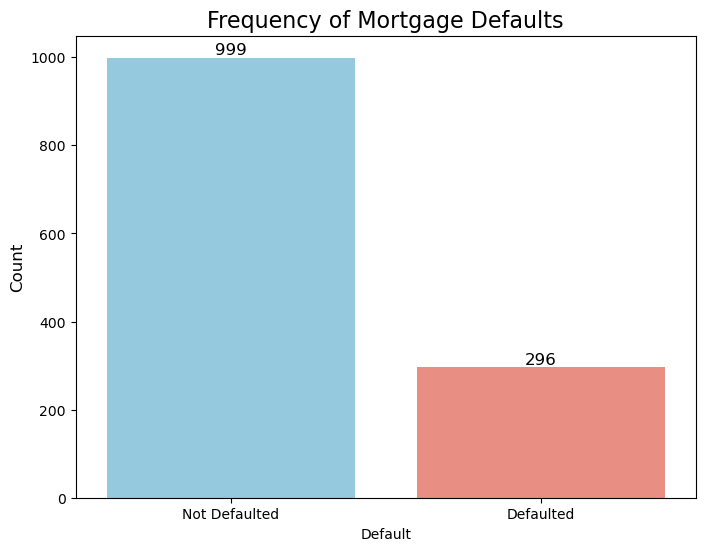

In [59]:
# convert 'Default' to string to use it as a hue
mortgage_df["Default"] = mortgage_df["Default"].astype(str)

# frequency counts of 'Default'
default_counts = mortgage_df["Default"].value_counts()

# create a bar chart with different colors using hue
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x=default_counts.index, 
    y=default_counts.values, 
    hue=default_counts.index, 
    palette=["skyblue", "salmon"], 
    dodge=False,
    legend=False  # suppress the legend
)

# add title and labels
plt.title("Frequency of Mortgage Defaults", fontsize=16)
# plt.xlabel("Default (0 = Not Defaulted, 1 = Defaulted)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

# display the plot
plt.show()


##### Create a horizontal bar chart

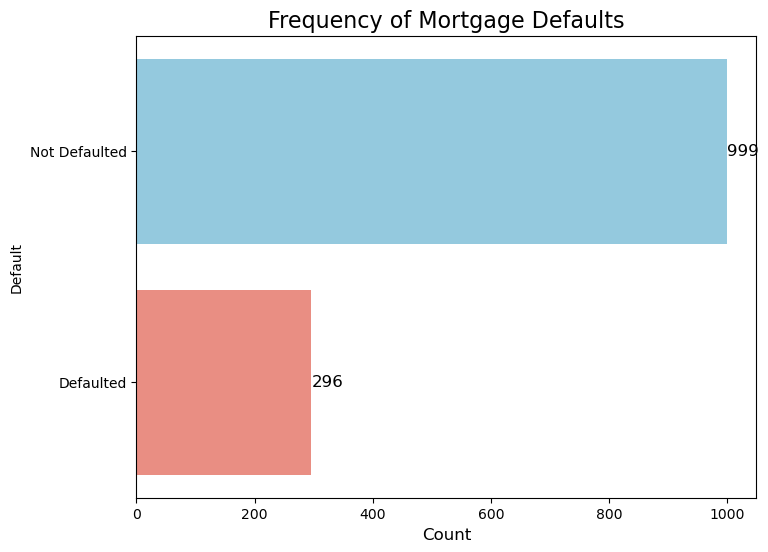

In [61]:
# convert 'Default' to string to use it as a hue
mortgage_df["Default"] = mortgage_df["Default"].astype(str)

# frequency counts of 'Default'
default_counts = mortgage_df["Default"].value_counts()

# create a horizontal bar chart with different colors using hue
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    y=default_counts.index, 
    x=default_counts.values, 
    hue=default_counts.index, 
    palette=["skyblue", "salmon"], 
    dodge=False, 
    legend=False  # Suppress the legend
)

# add title and labels
plt.title("Frequency of Mortgage Defaults", fontsize=16)
# plt.ylabel("Default (0 = Not Defaulted, 1 = Defaulted)", fontsize=12)
plt.xlabel("Count", fontsize=12)

# annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12)

# dDisplay the plot
plt.show()


##### Create a pie chart

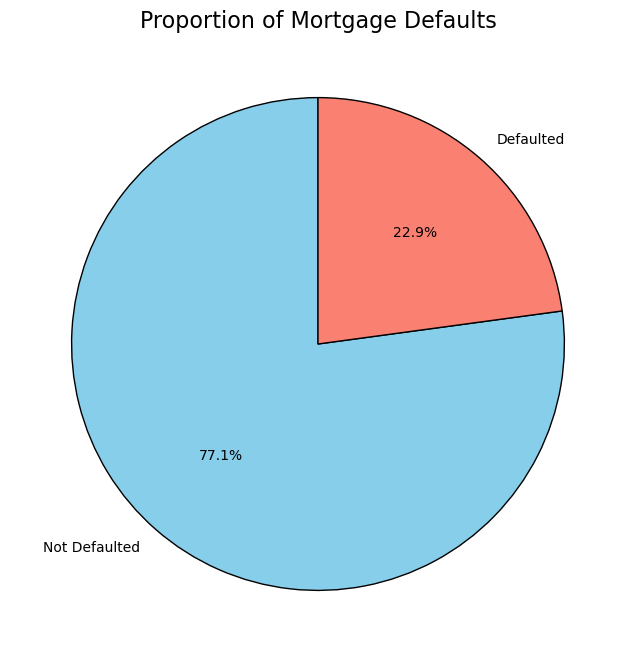

In [63]:
# Frequency counts of 'Default'
default_counts = mortgage_df["Default"].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    default_counts, 
    labels=["Not Defaulted", "Defaulted"], 
    autopct="%1.1f%%", 
    startangle=90, 
    colors=["skyblue", "salmon"],
    wedgeprops={"edgecolor": "black"}
)

# Add title
plt.title("Proportion of Mortgage Defaults", fontsize=16)

# Display the pie chart
plt.show()


_Note: Pie charts should not be used when there are many categories (rule of thumb: <= 5) or when categories overlap._

<br>

### Statistics for Two Categorical Variables 

Prepare the data

In [67]:
mortgage_df = pd.read_csv("mortgage.txt", encoding="utf-8", sep="|")
display(mortgage_df)

,CreditScore,HomeAge,YearsEmployed,CreditCardDebt,Year,Default
0,752,24,3,8930,2009,1
1,715,9,8,6403,2009,0
2,635,16,5,7561,2008,0
3,744,20,6,8628,2008,1
4,756,26,8,6083,2008,0
...,...,...,...,...,...,...
1290,786,21,3,5544,2007,0
1291,720,20,6,9676,2009,1
1292,676,17,4,8555,2008,1
1293,620,12,5,5370,2007,0


In [68]:
mortgage_df.isna().sum()

CreditScore       0
HomeAge           0
YearsEmployed     0
CreditCardDebt    0
Year              0
Default           0
dtype: int64

In [69]:
print(mortgage_df["Default"].unique())
print(mortgage_df["Year"].unique())

[1 0]
['2009' '2008' '2007' '-']


In [70]:
print(mortgage_df[mortgage_df["Year"] == "-"])

# count the number of rows where 'Year' is '-'
print(mortgage_df[mortgage_df["Year"] == "-"].shape[0])

    CreditScore  HomeAge YearsEmployed CreditCardDebt Year  Default
14          740        8             5           5490    -        0
1


In [71]:
print(mortgage_df.shape)
# remove rows where 'Year' is '-'
mortgage_df = mortgage_df[mortgage_df["Year"] != "-"].reset_index(drop=True)
print("row dropped")
print(mortgage_df.shape)

(1295, 6)
row dropped
(1294, 6)


In [72]:
# change the column to a categorical data type
mortgage_df["Default"] = mortgage_df["Default"].astype("category")
mortgage_df["Year"] = mortgage_df["Year"].astype("category")

# verify it is a categorical data type
print(mortgage_df["Default"].dtypes)
print(mortgage_df["Year"].dtypes)


category
category


<br>

##### Compare frequency and proportion across groups

In [75]:
# create a frequency table for 'Default' and 'Year'
frequency_table = pd.crosstab(mortgage_df["Default"], mortgage_df["Year"])

# display the frequency table
print("Frequency Table:")
print(frequency_table)


Frequency Table:
Year     2007  2008  2009
Default                  
0         332   312   354
1          51    91   154


```.crosstab()``` is used to create a contingency table, which summarizes the relationship between two or more categorical variables. This table is a bit confusing. Notice the difference between the row index of 0 and 1 (far left) and the value (1 (defaulted) & 0 (not defaulted).

<font color="darkmagenta">Interpretation: Number of non-defaults (0) stays fairly consistent from year to year, but more defaults increase in 2008 and 2009.</font>

<br>

##### Visualize the two categories with a stacked bar chart

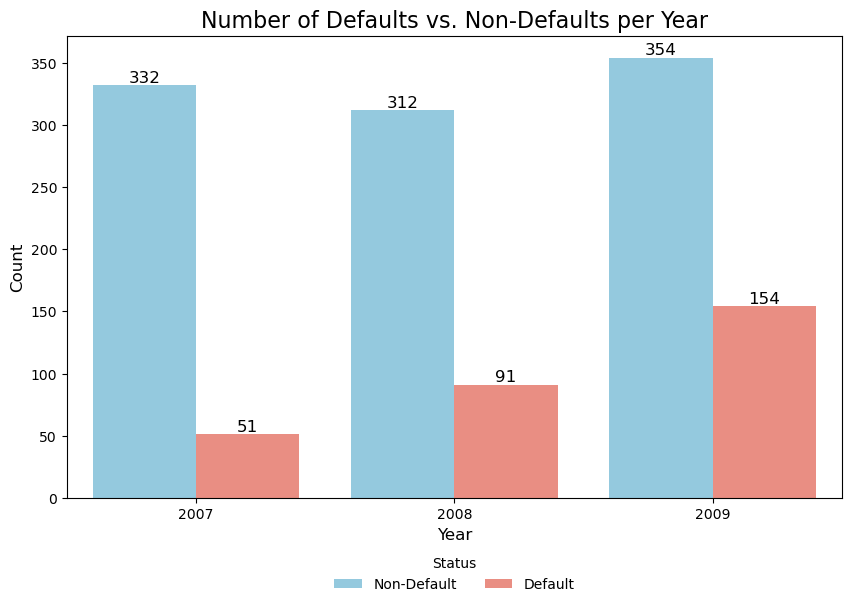

In [80]:
# prepare the data: Melt the contingency table to long format
default_year_table = pd.crosstab(mortgage_df["Year"], mortgage_df["Default"]).reset_index()
default_year_table = pd.melt(default_year_table, id_vars=["Year"], var_name="Default", value_name="Count")

# convert 'Default' column to categorical with proper labels
default_year_table["Default"] = default_year_table["Default"].astype(int).map({0: "Non-Default", 1: "Default"})

# create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=default_year_table, 
    x="Year", y="Count", hue="Default", 
    palette=["skyblue", "salmon"]
)

# annotate each bar with its value
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=12)
    # Annotate each bar with its value at the top of the bar

# add title and labels
plt.title("Number of Defaults vs. Non-Defaults per Year", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

# adjust the legend
plt.legend(title="Status", loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False)

# display the plot
plt.show()


<font color="darkmagenta">It looks like the number of non-defaults has remained steady, but the number of defaults seems to be increasing across the years.</font>

<br>

##### Joint Probablility Distribution  
Total of entire table = 100%  

In [84]:
# Create a contingency table (similar to table() in R)
contingency_table = pd.crosstab(mortgage_df["Default"], mortgage_df["Year"])

# Calculate the joint probability distribution
joint_probability = round(contingency_table / contingency_table.values.sum(), 2)

# Display the joint probability distribution
print("Joint Probability Distribution:")
print(joint_probability)

Joint Probability Distribution:
Year     2007  2008  2009
Default                  
0        0.26  0.24  0.27
1        0.04  0.07  0.12


<br>

##### Marginal probability  
Compare by row (row-wise)  

In [87]:
# create a contingency table for 'Default' and 'Year'
contingency_table = pd.crosstab(mortgage_df["Default"], mortgage_df["Year"])

In [88]:
# calculate marginal probabilities by row (axis=1)
marginal_probability_by_row = round(contingency_table.div(contingency_table.sum(axis=1), axis=0), 2)

# display the marginal probability distribution (by row)
print("Marginal Probability Distribution (by row):")
print(marginal_probability_by_row)


Marginal Probability Distribution (by row):
Year     2007  2008  2009
Default                  
0        0.33  0.31  0.35
1        0.17  0.31  0.52


<font color="darkmagenta">Interpretation: Majority of defaults occurred in 2008 and 2009, but that non-defaults are distributed evenly over the 3-year span.</font>

<br>

##### Marginal probability  
Column-wise  

In [92]:
# calculate marginal probabilities by column (axis=0)
marginal_probability_by_column = round(contingency_table.div(contingency_table.sum(axis=0), axis=1), 2)

# display the marginal probability distribution (by column)
print("\nMarginal Probability Distribution (by column):")
print(marginal_probability_by_column)



Marginal Probability Distribution (by column):
Year     2007  2008  2009
Default                  
0        0.87  0.77   0.7
1        0.13  0.23   0.3


<font color="darkmagenta">Interpretation: Rate of default increased from 2007 (13% of mortgages) to 2008 (23%) to 2009 (30%)</font>

<br>

<font color="darkmagenta">But are the differences in default rates significant?  </font>  

<br>

#### Chi-Square Test of Independence
  
Tests if there is an association between two categorical variables. This test evaluates how likely it is that any observed differences arose purely by chance.  
  
Hypotheses:  
Null Hypothesis (H<sub>0</sub>): The two variables are independent (no association) if _p-value > 0.05_.  
Alternative Hypothesis (H<sub>1</sub>): The two variables are dependent (associated) if _p-value <= 0.05_.  

In [98]:
# create a contingency table for 'Default' and 'Year'
contingency_table = pd.crosstab(mortgage_df["Default"], mortgage_df["Year"])

# perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# display the p-value and interpretation
print(f"Chi-Square Test p-value: {p_value:.4f}")

# set the significance level (alpha)
alpha = 0.05

# interpret the result
if p_value <= alpha:
    print("Reject H0: The number of defaults vs. non-defaults is related to the year.")
else:
    print("Fail to reject H0: The number of defaults vs. non-defaults is independent of the year.")


Chi-Square Test p-value: 0.0000
Reject H0: The number of defaults vs. non-defaults is related to the year.


<font color="darkmagenta">Interpretation: p is much smaller than 0.05, thus we reject the null hypothesis that _Year_ and _Default_ are independent. _Year_ and _Default_ are dependent.</font>

<br>

### Statistics for Two Continuous Variables

#### Pearson Correlation (Linear Correlation)

Correlation measures the **strength and direction of the linear relationship** between two continuous variables (e.g., height vs. weight).

It quantifies the degree to which two variables move together and is commonly denoted by the correlation coefficient _**r**_, which ranges from -1 to 1.
**_r_ = 1**: Perfect positive linear relationship (as one variable increases, the other also increases).
**_r_ = -1**: Perfect negative linear relationship (as one variable increases, the other decreases).
**_r_ = 0**: No linear relationship between the variables.

The Pearson correlation assumes that the data is continuous and normally distributed.

The Kendall or Spearman correlations may be more appropriate for comparing ordinal, rank data.


In [103]:
# calculate Pearson correlation between 'CreditScore' and 'HomeAge'
pearson_corr = mortgage_df["CreditScore"].corr(mortgage_df["HomeAge"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.0092
Interpretation: No or weak linear correlation.


<font color="darkmagenta">Interpretation: No linear correlation.</font>

<br>

#### Pearson Correlation Test

The Pearson correlation test is statistical hypothesis test that checks whether the linear relationship found in the Pearson correlation is statistically significant or if it could have occurred by chance. The test provides a _**p-value**_ to help make this decision.

Hypothesis test for significant correlation.   
H<sub>0</sub> = no correlation  
H<sub>1</sub> = correlation!=0  



In [107]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(mortgage_df["CreditScore"], mortgage_df["HomeAge"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")


Pearson Correlation Coefficient: 0.0092
P-value: 0.7416
Fail to reject H0: No significant correlation (correlation = 0).


<font color="darkmagenta">Interpretation: p > 0.05, thus we fail to reject the null hypothesis that the correlation is 0. There is no correlation. </font>

<br>

##### Visualize relationships between continuous variables with **scatter plot**.

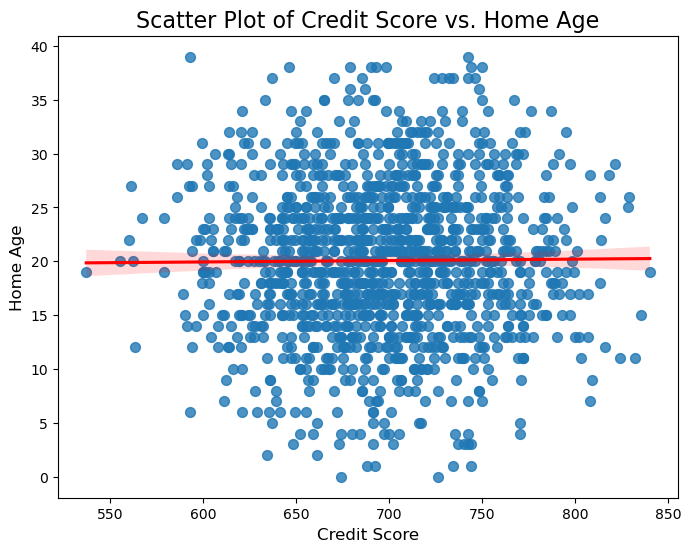

In [111]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="CreditScore", 
    y="HomeAge", 
    data=mortgage_df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Home Age", fontsize=12)
plt.title("Scatter Plot of Credit Score vs. Home Age", fontsize=16)

# display the plot
plt.show()

<font color="darkmagenta">Interpretation: no linear relationship.</font>